# **HOUSE PRICE PREDICTION**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
# checking for missing values

data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# dropping null values 
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

In [8]:
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11091,-117.89,33.82,18.0,3197.0,809.0,1894.0,726.0,3.6761,<1H OCEAN,140500.0
6606,-118.13,34.19,42.0,2203.0,412.0,1012.0,377.0,4.0714,INLAND,234000.0
7698,-118.12,33.96,38.0,2105.0,348.0,956.0,350.0,4.4125,<1H OCEAN,246000.0
11069,-117.86,33.84,19.0,1725.0,392.0,920.0,400.0,3.0087,<1H OCEAN,159400.0
15870,-122.41,37.76,52.0,492.0,139.0,316.0,168.0,3.0865,NEAR BAY,225000.0
...,...,...,...,...,...,...,...,...,...,...
735,-122.15,37.67,35.0,2472.0,398.0,1171.0,390.0,5.5797,NEAR BAY,198100.0
6674,-118.12,34.15,35.0,1760.0,447.0,984.0,384.0,3.4167,<1H OCEAN,198200.0
18053,-121.99,37.25,25.0,1743.0,212.0,604.0,200.0,10.7582,<1H OCEAN,500001.0
186,-122.23,37.79,52.0,1783.0,395.0,1659.0,412.0,2.9357,NEAR BAY,107900.0


<Axes: xlabel='latitude', ylabel='longitude'>

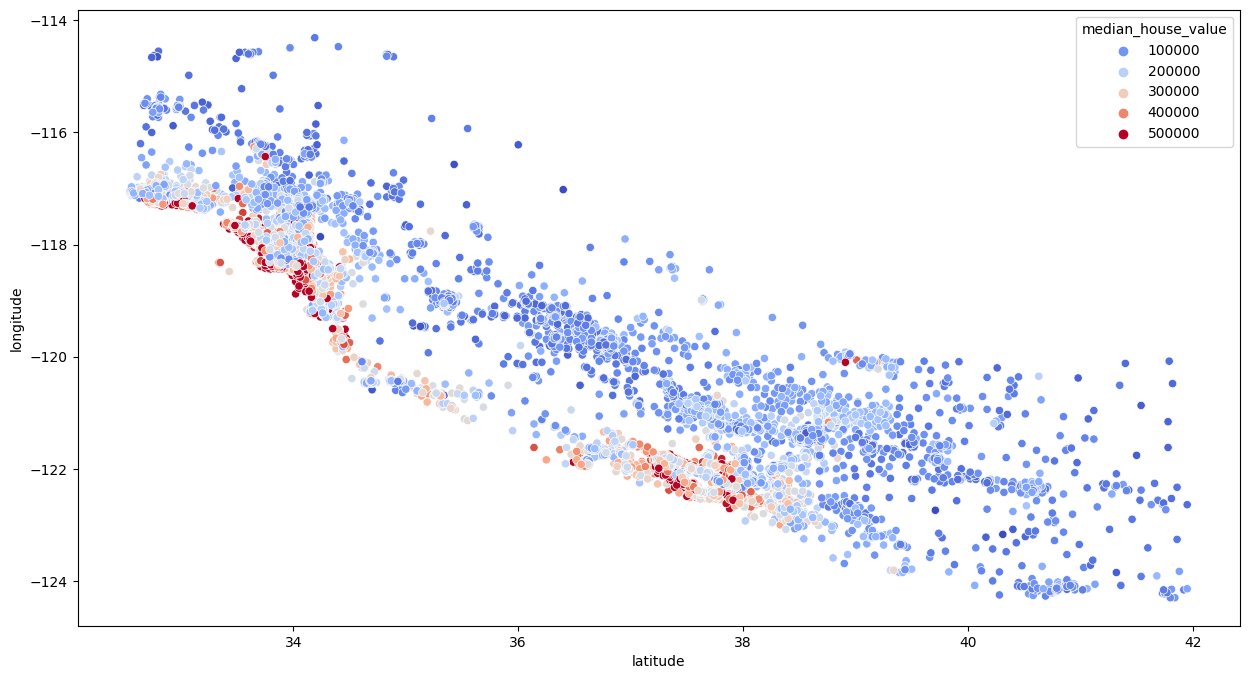

In [10]:
# house price in relation with lattitude & longitude (prices are higher when are close to ocean)
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

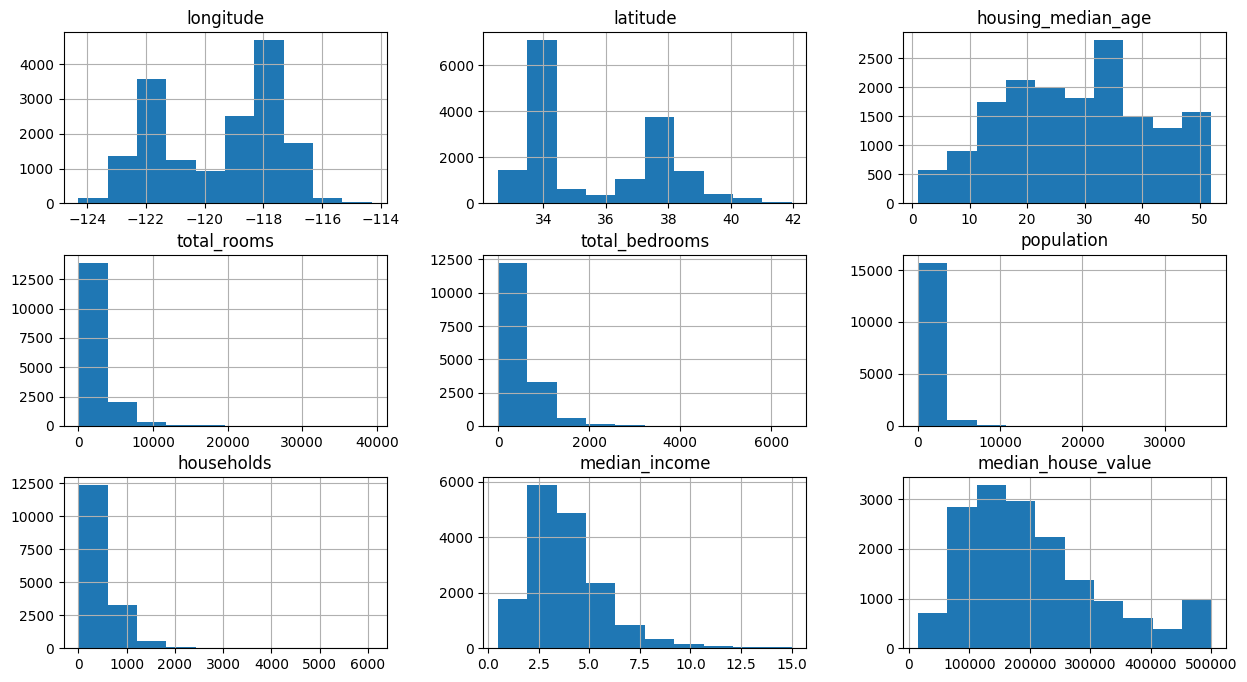

In [11]:
train_data.hist(figsize=(15,8))

C:\Users\OM\AppData\Local\Temp\ipykernel_19676\4030865306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

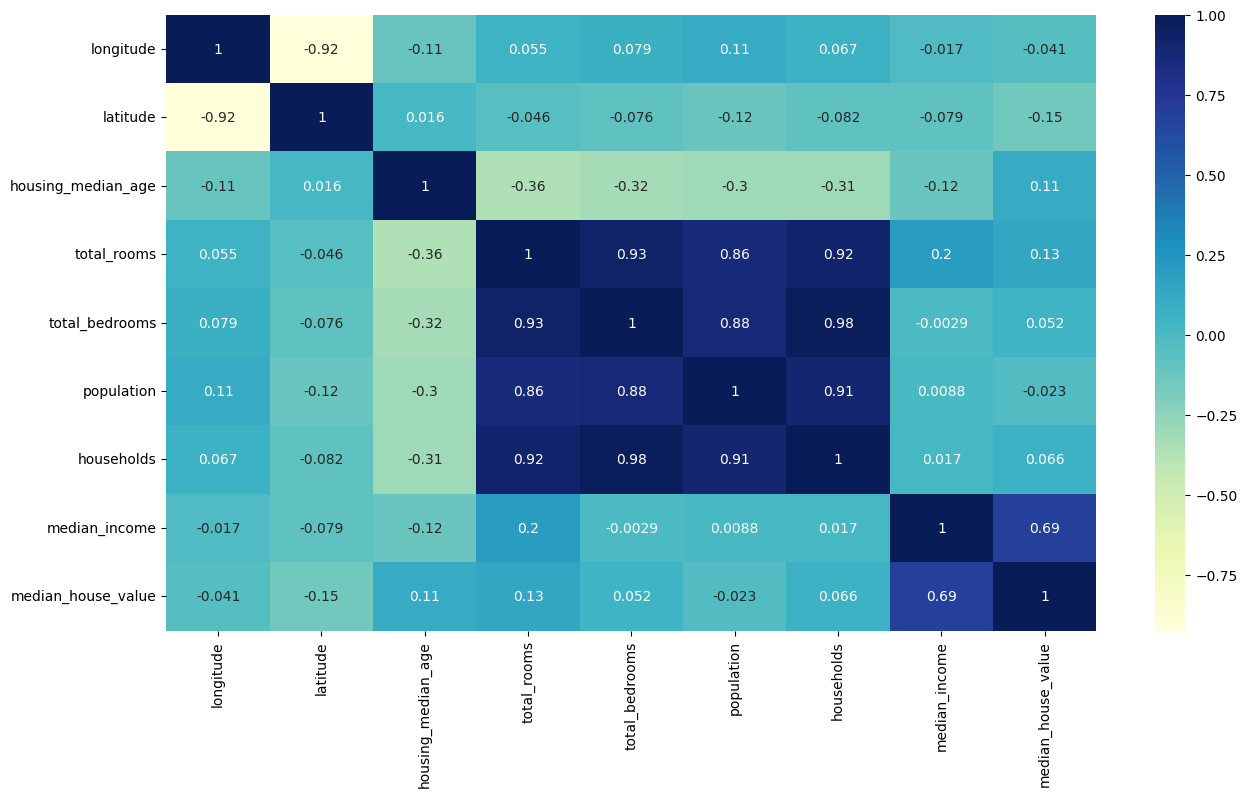

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

*Median income block correlates quite highly with median house value*

# **Data Preprocessing**

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1 )
train_data['population'] = np.log(train_data['population'] + 1 )
train_data['households'] = np.log(train_data['households'] + 1 )

'\n** After using natural logarithm on features the trained data looks alot like gaussian bell curve  \n   and normal distribution od data \n'

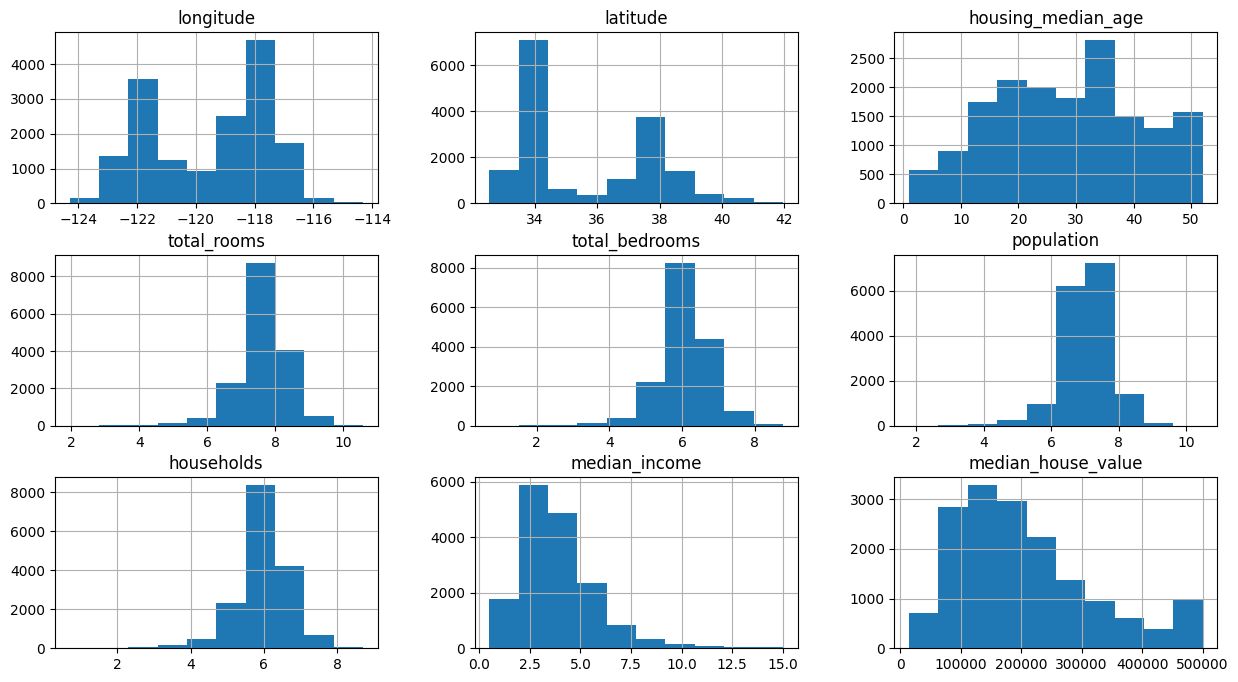

In [14]:
train_data.hist(figsize=(15,8))

"""
** After using natural logarithm on features the trained data looks alot like gaussian bell curve  
   and normal distribution od data 
"""

**converting categorical variables into dummy or indicator variables for 'ocean_proximity'**

In [15]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7198
INLAND        5227
NEAR OCEAN    2113
NEAR BAY      1803
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11091,-117.89,33.82,18.0,8.070281,6.697034,7.546974,6.588926,3.6761,140500.0,1,0,0,0,0
6606,-118.13,34.19,42.0,7.698029,6.023448,6.920672,5.934894,4.0714,234000.0,0,1,0,0,0
7698,-118.12,33.96,38.0,7.652546,5.855072,6.863803,5.860786,4.4125,246000.0,1,0,0,0,0
11069,-117.86,33.84,19.0,7.453562,5.973810,6.825460,5.993961,3.0087,159400.0,1,0,0,0,0
15870,-122.41,37.76,52.0,6.200509,4.941642,5.758902,5.129899,3.0865,225000.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-122.15,37.67,35.0,7.813187,5.988961,7.066467,5.968708,5.5797,198100.0,0,0,0,1,0
6674,-118.12,34.15,35.0,7.473637,6.104793,6.892642,5.953243,3.4167,198200.0,1,0,0,0,0
18053,-121.99,37.25,25.0,7.463937,5.361292,6.405228,5.303305,10.7582,500001.0,1,0,0,0,0
186,-122.23,37.79,52.0,7.486613,5.981414,7.414573,6.023448,2.9357,107900.0,0,0,0,1,0


**Feature Engineering**

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

**Model building & training**

**Model 1 : LinearRegression**

In [19]:
from sklearn.linear_model import LinearRegression

x_train = train_data.drop(['median_house_value'], axis = 1)
y_train = train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [21]:
test_data = X_train.join(Y_train)


test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1 )
test_data['population'] = np.log(test_data['population'] + 1 )
test_data['households'] = np.log(test_data['households'] + 1 )

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

In [23]:
x_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']

In [24]:
reg.score(x_test, y_test)

0.6693671466129052

**Model 2 : RandomForestRegressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
forest.score(x_test, y_test)

0.9740390421657287